Top 5 Crimes in West LA Region (2020):
BURGLARY                                                   1066
BURGLARY FROM VEHICLE                                       813
THEFT OF IDENTITY                                           659
THEFT PLAIN - PETTY ($950 & UNDER)                          632
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     499
Name: Crm Cd Desc, dtype: int64




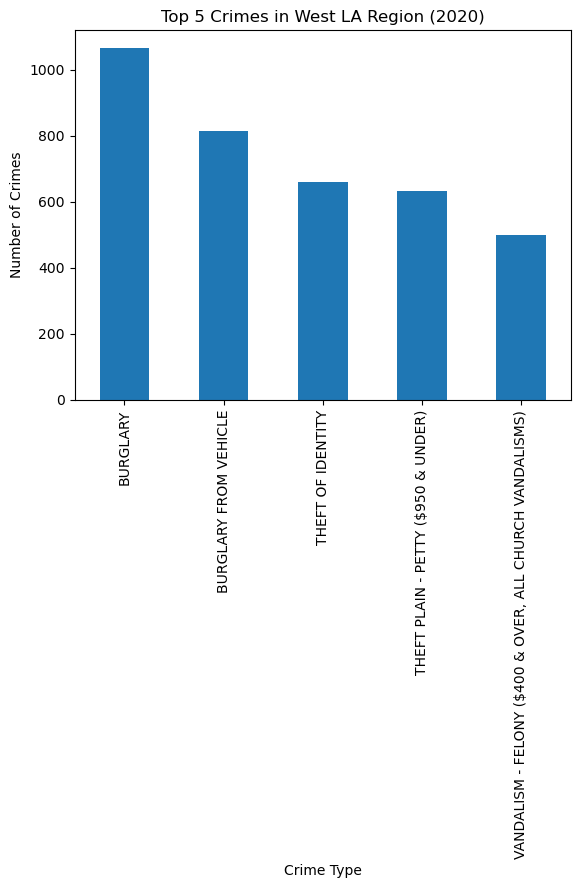

Top 5 Crimes in West LA Region (2021):
BURGLARY                                                   960
BURGLARY FROM VEHICLE                                      822
THEFT OF IDENTITY                                          742
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    711
THEFT PLAIN - PETTY ($950 & UNDER)                         675
Name: Crm Cd Desc, dtype: int64




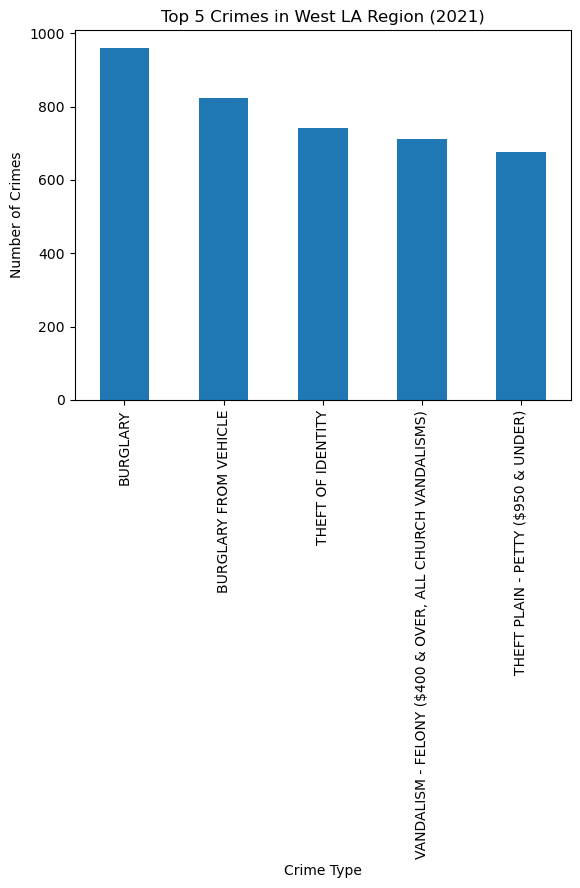

Top 5 Crimes in West LA Region (2022):
BURGLARY                                                   1120
THEFT OF IDENTITY                                           871
THEFT PLAIN - PETTY ($950 & UNDER)                          715
BURGLARY FROM VEHICLE                                       707
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     672
Name: Crm Cd Desc, dtype: int64




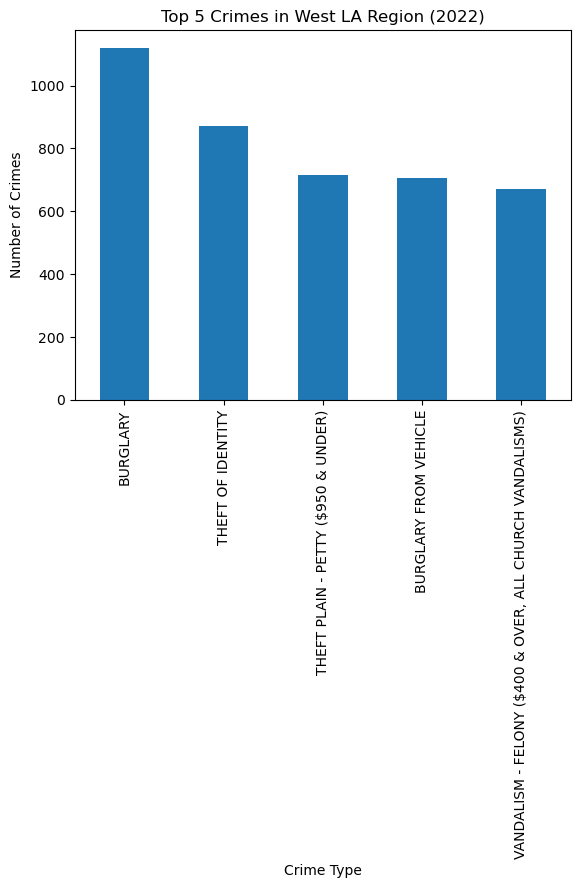

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read data from the CSV file
data = pd.read_csv("Resources/Crime_Data_from_2020_to_Present.csv")


# Convert date columns to datetime objects
data["DATE OCC"] = pd.to_datetime(data["DATE OCC"], errors='coerce')
data["Date Rptd"] = pd.to_datetime(data["Date Rptd"], errors='coerce')

# Remove unnecessary columns
columns_to_keep = ['AREA NAME', 'DATE OCC', 'Crm Cd Desc']
data = data[columns_to_keep]


# Handle outliers (example: remove rows with crime count > 99th percentile)
crime_counts = data["Crm Cd Desc"].value_counts()
threshold = crime_counts.quantile(0.99)
crime_counts_filtered = crime_counts[crime_counts <= threshold]
data = data[data["Crm Cd Desc"].isin(crime_counts_filtered.index)]

# Filter data by region (Northeast Los Angeles)
westla_crime_data = data[data["AREA NAME"] == "West LA"]

# Create a DataFrame for each year
years = [2020, 2021, 2022]
data_by_year = {year: westla_crime_data[westla_crime_data["DATE OCC"].dt.year == year] for year in years}

# 1. Top 5 crimes in each region (Bar chart)
for year, df in data_by_year.items():
    top_5_crimes = df["Crm Cd Desc"].value_counts().head(5)

    # Print the table for the bar chart
    print(f"Top 5 Crimes in West LA Region ({year}):")
    print(top_5_crimes)
    print("\n")

    # Plot the bar chart
    plt.figure()
    top_5_crimes.plot(kind='bar')
    plt.title(f"Top 5 Crimes in West LA Region ({year})")
    plt.xlabel("Crime Type")
    plt.ylabel("Number of Crimes")
    plt.show()

Top 5 Crimes vs Years:
                                                    2020  2021  2022
BURGLARY                                            1066   960  1120
BURGLARY FROM VEHICLE                                813   822   707
THEFT OF IDENTITY                                    659   742   871
THEFT PLAIN - PETTY ($950 & UNDER)                   632   675   715
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...   499   711   672




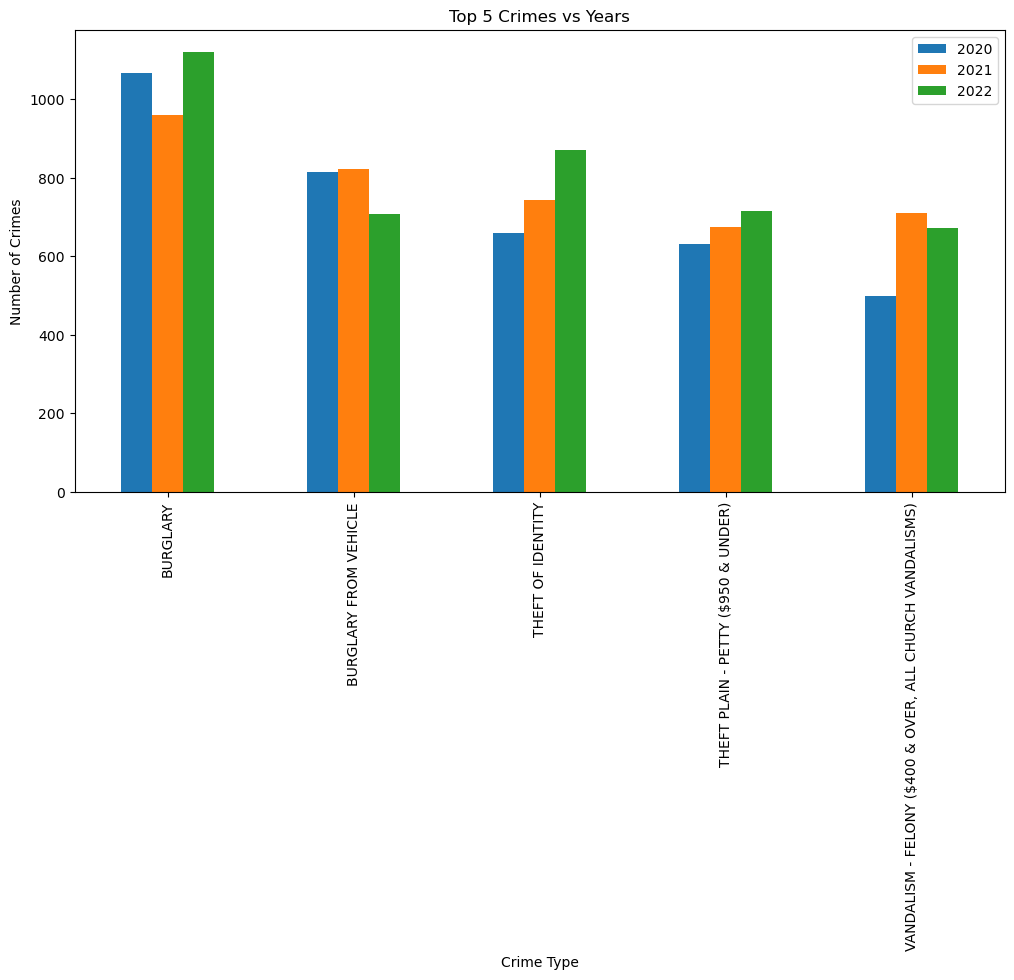

Top 5 Crimes vs Years:
                                                    2020  2021  2022
BURGLARY                                            1066   960  1120
BURGLARY FROM VEHICLE                                813   822   707
THEFT OF IDENTITY                                    659   742   871
THEFT PLAIN - PETTY ($950 & UNDER)                   632   675   715
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...   499   711   672




In [40]:
# 2. Top 5 crimes vs years (Bar Chart)
top_5_crimes_overall = westla_crime_data["Crm Cd Desc"].value_counts().head(5).index.tolist()

# Calculate the number of top 5 crimes by year
crime_counts_by_year = {}
for year, crimes in data_by_year.items():
    crime_counts_by_year[year] = crimes["Crm Cd Desc"].value_counts().loc[top_5_crimes_overall]

# Print the table for the bar chart
print("Top 5 Crimes vs Years:")
print(pd.DataFrame(crime_counts_by_year))
print("\n")

# Plot the bar chart
yearly_crime_counts_df = pd.DataFrame(crime_counts_by_year)
yearly_crime_counts_df.plot(kind="bar", figsize=(12, 6))
plt.title("Top 5 Crimes vs Years")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.show()

print("Top 5 Crimes vs Years:")
print(pd.DataFrame(crime_counts_by_year))
print("\n")

In [ ]:
for rows in range(crime_counts_by_year):
    

Top 5 Crimes vs Seasons:
                                                    Winter  Spring  Summer  \
BURGLARY                                               912     961     829   
BURGLARY FROM VEHICLE                                  788     672     533   
THEFT OF IDENTITY                                      706     689     549   
THEFT PLAIN - PETTY ($950 & UNDER)                     674     559     464   
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...     576     549     488   

                                                    Autumn  
BURGLARY                                               752  
BURGLARY FROM VEHICLE                                  553  
THEFT OF IDENTITY                                      550  
THEFT PLAIN - PETTY ($950 & UNDER)                     505  
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...     479  




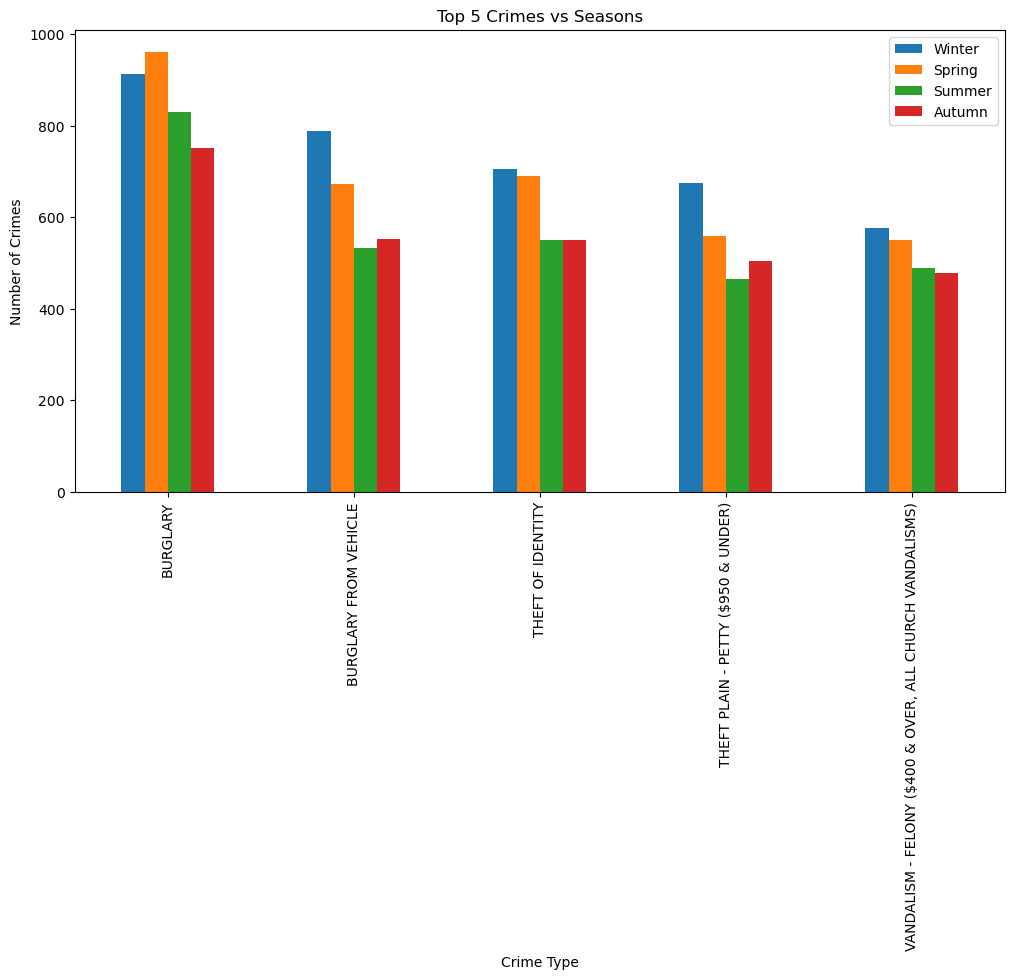

Winter crime counts for 2020:
BURGLARY                                                   235
BURGLARY FROM VEHICLE                                      230
THEFT OF IDENTITY                                          168
THEFT PLAIN - PETTY ($950 & UNDER)                         210
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    122
Name: Crm Cd Desc, dtype: int64


Winter crime counts for 2021:
BURGLARY                                                   246
BURGLARY FROM VEHICLE                                      234
THEFT OF IDENTITY                                          172
THEFT PLAIN - PETTY ($950 & UNDER)                         157
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    158
Name: Crm Cd Desc, dtype: int64


Winter crime counts for 2022:
BURGLARY                                                   286
BURGLARY FROM VEHICLE                                      200
THEFT OF IDENTITY                                          215
THEFT PLAIN - PETTY ($9

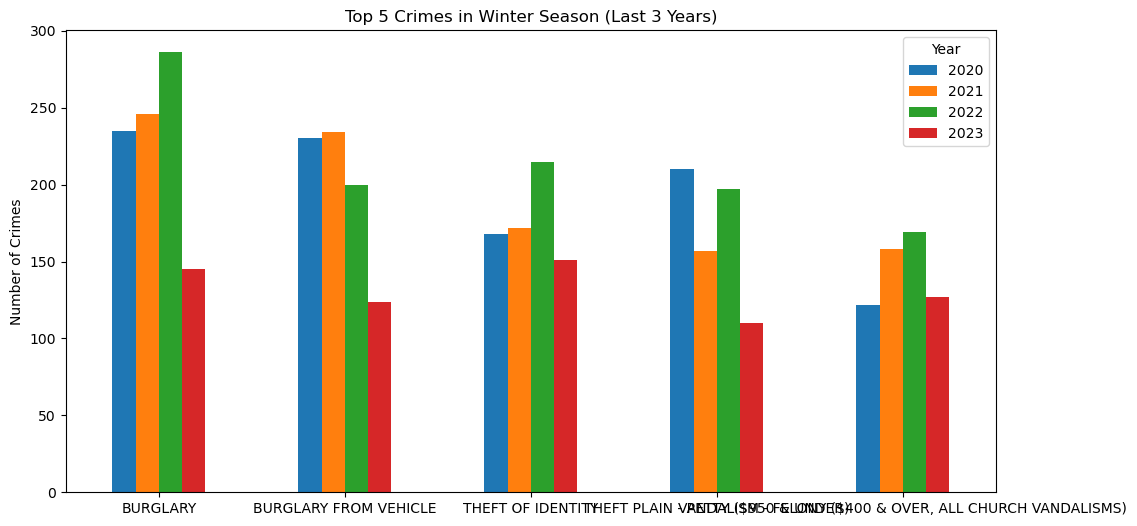

In [17]:
# 2. Top 5 crimes vs seasons (Bar Chart)
seasons = {"Winter": [12, 1, 2], "Spring": [3, 4, 5], "Summer": [6, 7, 8], "Autumn": [9, 10, 11]}
crimes_by_season = {season: westla_crime_data[westla_crime_data["DATE OCC"].dt.month.isin(months)] for season, months in seasons.items()}
top_5_crimes_overall = westla_crime_data["Crm Cd Desc"].value_counts().head(5).index.tolist()

# Calculate the number of top 5 crimes by season
crime_counts_by_season = {}
for season, crimes in crimes_by_season.items():
    crime_counts_by_season[season] = crimes["Crm Cd Desc"].value_counts().loc[top_5_crimes_overall]


# Print the table for the bar chart
print("Top 5 Crimes vs Seasons:")
print(pd.DataFrame(crime_counts_by_season))
print("\n")
# Plot the bar chart
seasonal_crime_counts_df = pd.DataFrame(crime_counts_by_season)
seasonal_crime_counts_df.plot(kind="bar", figsize=(12, 6))
plt.title("Top 5 Crimes vs Seasons")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.show()

# Calculate the number of top 5 crimes for Winter season in each year
winter_crime_counts_by_year = {}
for year, df in data_by_year.items():
    winter_data = df[df["DATE OCC"].dt.month.isin(seasons["Winter"])]
    winter_crime_counts_by_year[year] = winter_data["Crm Cd Desc"].value_counts().loc[top_5_crimes_overall]

# Display the Winter crime counts for each year
for year, winter_crime_counts in winter_crime_counts_by_year.items():
    print(f"Winter crime counts for {year}:")
    print(winter_crime_counts)
    print("\n")

# Print the table for the bar graph
print("Top 5 Crimes in Winter Season (Last 3 Years):")
print(pd.DataFrame(winter_crime_counts_by_year))
print("\n")

# Create a DataFrame for Winter crime counts for each year
winter_crime_counts_df = pd.DataFrame(winter_crime_counts_by_year)

# Plot the bar graph
ax = winter_crime_counts_df.plot.bar(rot=0, figsize=(12, 6))
ax.set_ylabel("Number of Crimes")
ax.set_title("Top 5 Crimes in Winter Season (Last 3 Years)")
plt.xticks(range(len(top_5_crimes_overall)), top_5_crimes_overall)
plt.legend(title="Year")
plt.show()

In [32]:
# 3. Top 3 crimes vs month (Line chart)
top_5_crimes_overall = westla_crime_data["Crm Cd Desc"].value_counts().head(5).index.tolist()
top_5_crimes_data = westla_crime_data[westla_crime_data["Crm Cd Desc"].isin(top_5_crimes_overall)]
top_5_crimes_data

,AREA NAME,DATE OCC,Crm Cd Desc
31,West LA,2020-04-28,THEFT OF IDENTITY
133,West LA,2020-09-18,THEFT OF IDENTITY
162,West LA,2020-10-24,BURGLARY
398,West LA,2020-08-26,THEFT OF IDENTITY
555,West LA,2020-01-30,THEFT OF IDENTITY
...,...,...,...
712355,West LA,2023-02-01,THEFT OF IDENTITY
712367,West LA,2023-04-22,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
712426,West LA,2023-02-02,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
712747,West LA,2023-02-02,THEFT PLAIN - PETTY ($950 & UNDER)


In [33]:
top_5_crimes_data["year"] = np.nan
top_5_crimes_data['year']= top_5_crimes_data['DATE OCC'].dt.year
top_5_crimes_data

/var/folders/7c/2x7ds_g50579qly0t0bqv6kc0000gn/T/ipykernel_52781/1760790471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_crimes_data["year"] = np.nan
/var/folders/7c/2x7ds_g50579qly0t0bqv6kc0000gn/T/ipykernel_52781/1760790471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_crimes_data['year']= top_5_crimes_data['DATE OCC'].dt.year


,AREA NAME,DATE OCC,Crm Cd Desc,year
31,West LA,2020-04-28,THEFT OF IDENTITY,2020
133,West LA,2020-09-18,THEFT OF IDENTITY,2020
162,West LA,2020-10-24,BURGLARY,2020
398,West LA,2020-08-26,THEFT OF IDENTITY,2020
555,West LA,2020-01-30,THEFT OF IDENTITY,2020
...,...,...,...,...
712355,West LA,2023-02-01,THEFT OF IDENTITY,2023
712367,West LA,2023-04-22,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",2023
712426,West LA,2023-02-02,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",2023
712747,West LA,2023-02-02,THEFT PLAIN - PETTY ($950 & UNDER),2023


In [35]:
top_5_crimes_data_year = pd.DataFrame(top_5_crimes_data.loc[top_5_crimes_data["year"] != 2023, :])
top_5_crimes_data_year

,AREA NAME,DATE OCC,Crm Cd Desc,year
31,West LA,2020-04-28,THEFT OF IDENTITY,2020
133,West LA,2020-09-18,THEFT OF IDENTITY,2020
162,West LA,2020-10-24,BURGLARY,2020
398,West LA,2020-08-26,THEFT OF IDENTITY,2020
555,West LA,2020-01-30,THEFT OF IDENTITY,2020
...,...,...,...,...
640950,West LA,2022-01-14,THEFT OF IDENTITY,2022
640957,West LA,2022-08-20,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",2022
640995,West LA,2022-01-17,BURGLARY FROM VEHICLE,2022
641043,West LA,2022-04-01,BURGLARY,2022


Top 5 Crimes vs Month (2020 - 2023):
Crm Cd Desc  BURGLARY  BURGLARY FROM VEHICLE  THEFT OF IDENTITY  \
DATE OCC                                                          
2020-01            76                     83                 63   
2020-02            76                     62                 50   
2020-03            94                     55                 62   
2020-04            71                     69                 61   
2020-05           128                     67                 71   
2020-06            96                     80                 55   
2020-07            90                     64                 41   
2020-08            81                     53                 57   
2020-09            81                     46                 54   
2020-10            92                     75                 49   
2020-11            98                     74                 41   
2020-12            83                     85                 55   
2021-01            82    

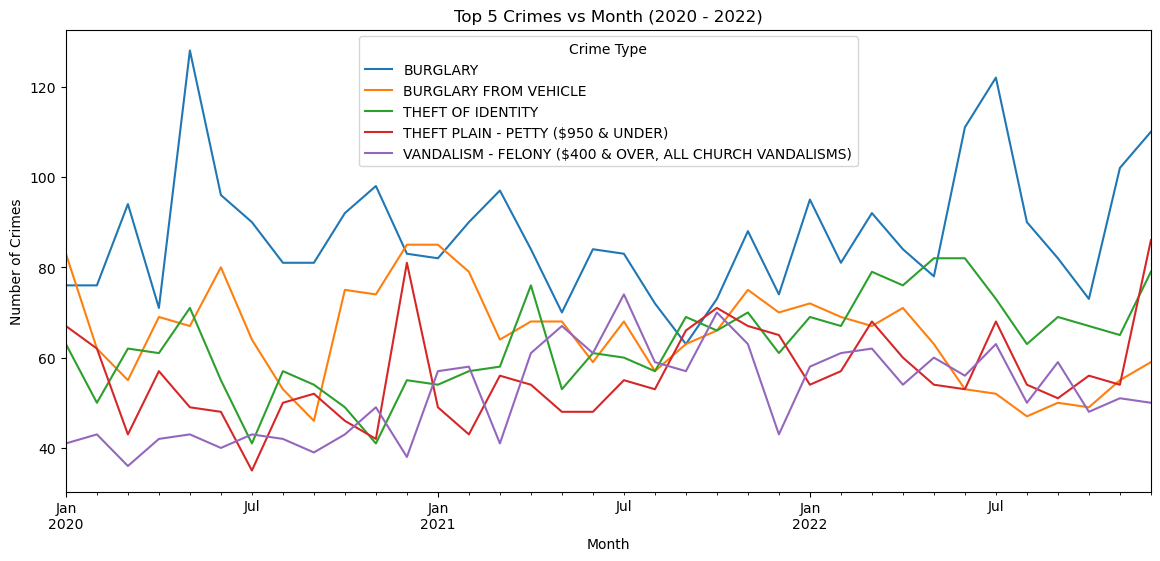

Top 5 Crimes During Socioeconomic Events:
                                                    Pre-COVID  During COVID  \
BURGLARY                                                 1986         23054   
BURGLARY FROM VEHICLE                                    2679         23503   
THEFT OF IDENTITY                                        1748         17791   
THEFT PLAIN - PETTY ($950 & UNDER)                       2327         19683   
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...       2141         24452   

                                                    Post-COVID  \
BURGLARY                                                 18418   
BURGLARY FROM VEHICLE                                    18210   
THEFT OF IDENTITY                                        26731   
THEFT PLAIN - PETTY ($950 & UNDER)                       14448   
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...       17215   

                                                    During Inflation  \
BURGLARY      

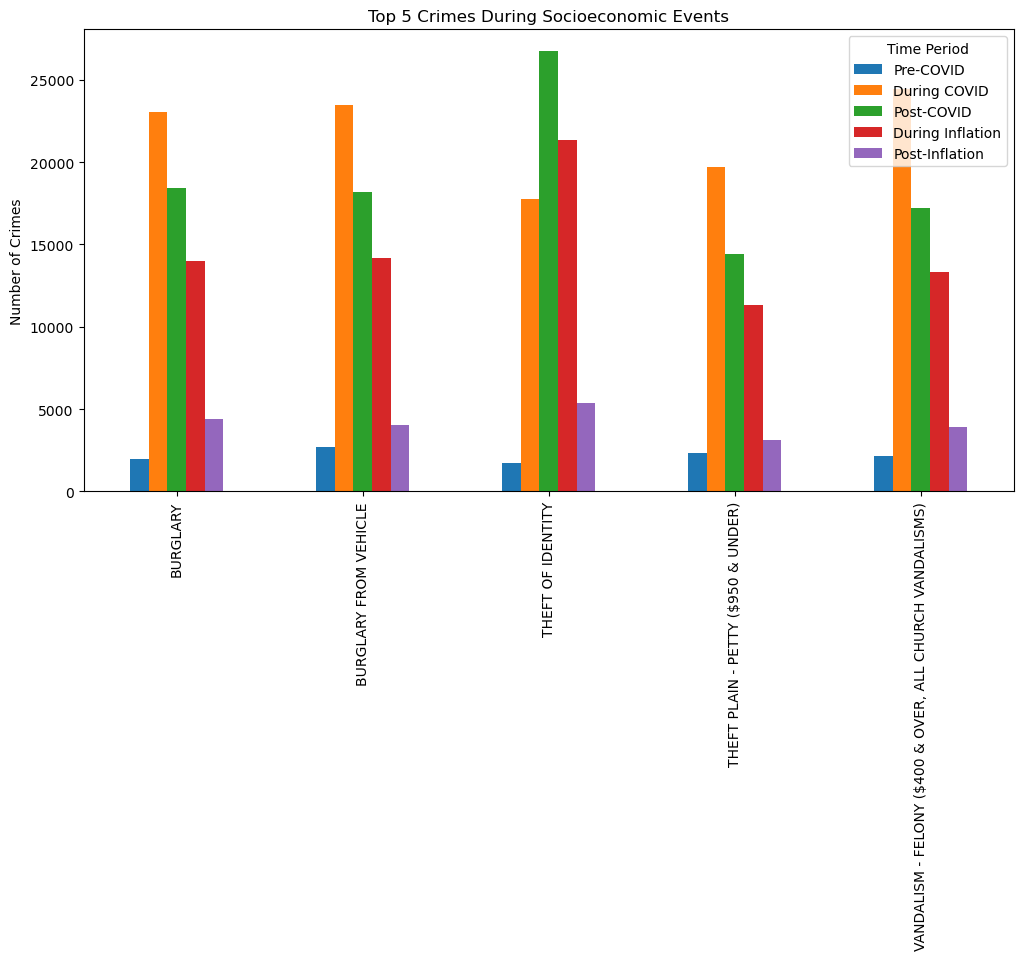

In [39]:

crimes_by_month = top_5_crimes_data_year.groupby([top_5_crimes_data["DATE OCC"].dt.to_period("M"), "Crm Cd Desc"]).size().unstack().fillna(0)

# Print the table for the line chart
print("Top 5 Crimes vs Month (2020 - 2023):")
print(crimes_by_month)
print("\n")

# Plot the line chart
fig, ax = plt.subplots(figsize=(14, 6))
crimes_by_month.plot(ax=ax)
plt.title("Top 5 Crimes vs Month (2020 - 2022)")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.legend(title="Crime Type")
plt.show()


top_5_crimes = top_5_crimes_overall

pre_covid_period = (data["DATE OCC"] < "2020-03-01")
during_covid_period = (data["DATE OCC"] >= "2020-03-01") & (data["DATE OCC"] <= "2021-12-31")
post_covid_period = (data["DATE OCC"] > "2021-12-31")

# Adjust the inflation periods if needed
during_inflation_period = (data["DATE OCC"] >= "2022-01-01") & (data["DATE OCC"] <= "2022-12-31")
post_inflation_period = (data["DATE OCC"] > "2022-12-31")

pre_covid_crime_counts = data[pre_covid_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes]
during_covid_crime_counts = data[during_covid_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes]
post_covid_crime_counts = data[post_covid_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes]

during_inflation_crime_counts = data[during_inflation_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes]
post_inflation_crime_counts = data[post_inflation_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes]


crime_counts_by_period = pd.DataFrame({
    "Pre-COVID": pre_covid_crime_counts,
    "During COVID": during_covid_crime_counts,
    "Post-COVID": post_covid_crime_counts,
    "During Inflation": during_inflation_crime_counts,
    "Post-Inflation": post_inflation_crime_counts
})


# Print the table for the bar chart
print("Top 5 Crimes During Socioeconomic Events:")
print(crime_counts_by_period)
print("\n")


ax = crime_counts_by_period.plot.bar(rot=0, figsize=(12, 6))
ax.set_ylabel("Number of Crimes")
ax.set_title("Top 5 Crimes During Socioeconomic Events")
plt.xticks(range(len(top_5_crimes)), top_5_crimes, rotation = 90)
plt.legend(title="Time Period")
plt.show()